# Sports Image Classification Using a Convolutional Neural Network

### The Task

Taken from this website: https://aiplanet.com/challenges/322/data-sprint-104-theme-identification-of-sports/overview/about.

Sports are an activity involving physical exertion and skill in which an individual or team competes against another or others for entertainment. It is a part of every culture past and present, but each culture has its own definition of sports. No one can say when sports began. Since it is impossible to imagine a time when children did not spontaneously run races or wrestle, it is clear that children have always included sports in their play, but one can only speculate about the emergence of sports as autotelic physical contests for adults

 

An agency of the Governmental Sports Authority is planning to implement an automated system based on computer vision so that it can identify the type of Sport based on images.. As a consultant for this project, you are responsible for developing an efficient model.

 

Your Task is to build an Image Classification Model using CNN that classifies to which class of sports each image belongs to.

### Importing Libraries and Data

In [1]:
import pandas as pd  # Data analysis and manipultion tool
import numpy as np  # Fundamental package for linear algebra and multidimensional arrays
import tensorflow as tf  # Deep Learning Tool
import os  # OS module in Python provides a way of using operating system dependent functionality
import cv2  # Library for image processing
from sklearn import preprocessing
# For splitting the data into train and test set
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt  # Library for plotting training the model
# Library for seeing performance of model
from sklearn.metrics import confusion_matrix, classification_report

Here, I downloaded the training and testing data images. I make the images the same size (250 by 250) and make a list that contains these resized image arrays and their corresponding numeric labels. I then changed the labels into numerical values and then split the data into training and testing sets. I then made them 3d arrays.

In [16]:
labels = pd.read_csv("Training_set.csv") # loading the labels
label_encoder = preprocessing.LabelEncoder()
labels['num_label'] = label_encoder.fit_transform(labels['label']) # Encode labels to numerical values
file_paths = [[fname, 'train/' + fname] for fname in labels['filename']]
images = pd.DataFrame(file_paths, columns=['filename', 'filepaths'])
train_data = pd.merge(images, labels, how = 'right', on = 'filename')

data = [] # initialize an empty numpy array
image_size = 250 # image size taken is 250 here. one can take other size too
for i in range(len(train_data)):
    img_array = cv2.imread(train_data['filepaths'][i], cv2.IMREAD_GRAYSCALE) # reading in the image as a greyscale array
    new_img_array = cv2.resize(img_array, (image_size, image_size)) # resizing the image array
    data.append([new_img_array, train_data['num_label'][i]])

In [17]:
train, test = train_test_split(data, test_size=0.30) #splitting training and testing data

In [18]:
#making lists to store training and testing images and labels
train_images = []
train_labels = []
for tr in train:
    train_images.append(tr[0])
    train_labels.append(tr[1])

test_images = []
test_labels = []
for te in test:
    test_images.append(te[0])
    test_labels.append(te[1])

#making the lists numpy arrays
train_images = np.array(train_images)
train_labels = np.array(train_labels)
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [19]:
#making the arrays 3d greyscale
train_images_gr = train_images.reshape(train_images.shape[0], 250, 250, 1)
test_images_gr = test_images.reshape(test_images.shape[0], 250, 250, 1)

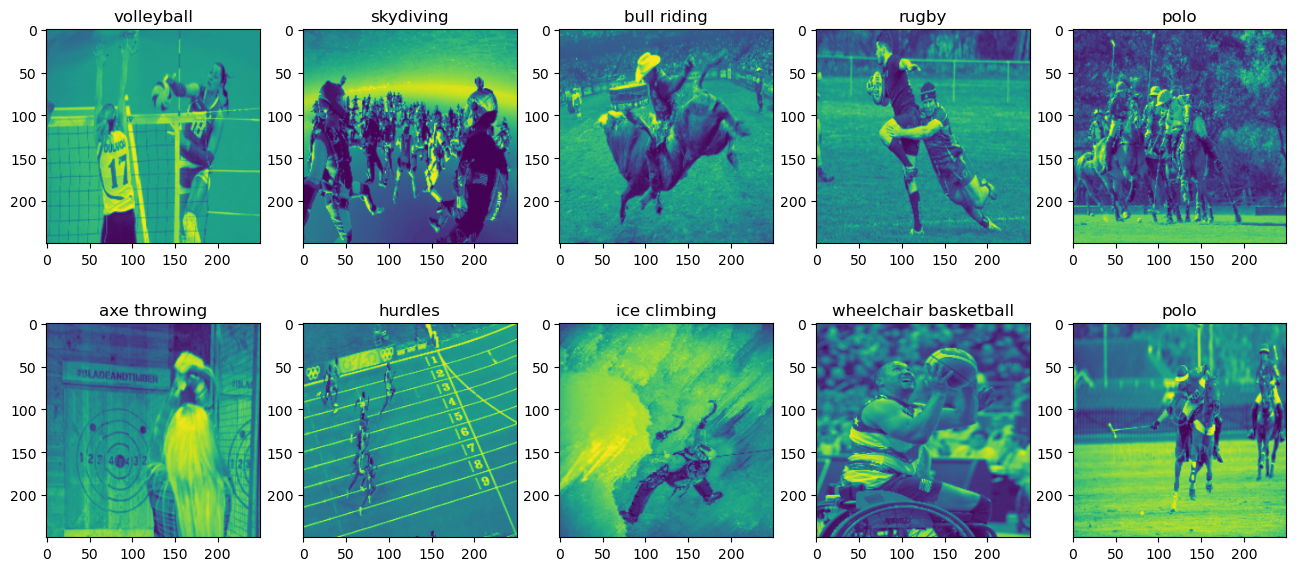

In [20]:
#Plotting first 10 images
fig, ax = plt.subplots(2, 5, figsize=(16, 7))
c = 0
class_names = list(label_encoder.classes_)
for i in range(10):
    idx = i // 5
    idy = i % 5
    ax[idx, idy].imshow(train_images_gr[i])
    ax[idx, idy].set_title(class_names[train_labels[i]])

### Model Building

Now I will be using Tensorflow and keras to build a convolutional neural network(CNN). A CNN differs from a traditional artificial neural network(ANN) because it is able identify spatial features in the input data. In a traditional ANN, the input is often a one dimensional input vector, which makes the ANN susceptible to correcting itself based on the input from the data. For example, if I had a dataset of pictures of flowers, and I trained an ANN to find if an image contains a flower, the ANN might change its output based on where in the image the flower is, since in the 1D vector input, the data we are training on changes. A CNN on the other hand is spatially invariant, meaning that regardless of the position of the flower in the image, it should still recognize the flower. In a CNN, there are convolutional hidden layers, which essentially has a window of input that is sent through the layer onto the next layer, which we keep training on different parts of the data. Another important part of the CNN is the max pooling layer, which simply outputs the max values from the input into each of its nodes. This simple yet effective layer is important because one, it maps down the complexity of the model, and two, it also helps regularize it. A few things I have also added to model that is not solely related to CNNs is a rescaling layer and dropout layers. The rescaling layer makes the values of the image arrays we input be floats from 0 to 1, instead of integer values from 0 to 255. The dropout layers are important to fight overfitting. Dropout is essentially choosing a percentage of random nodes in the layer to drop, which will help regularize the model. 

In [38]:
# define input shape
INPUT_SHAPE = (250, 250, 1)

# define sequential model
model = tf.keras.models.Sequential()
# define rescaling layer
model.add(tf.keras.layers.Rescaling(1./255, input_shape=INPUT_SHAPE))
# define conv-pool layers - set 1
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='valid', input_shape=INPUT_SHAPE, kernel_regularizer=tf.keras.regularizers.l2(l=0.0001)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
# define conv-pool layers - set 2
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='valid', input_shape=INPUT_SHAPE, kernel_regularizer=tf.keras.regularizers.l2(l=0.0001)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
# define conv-pool layers -set 3
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='valid', input_shape=INPUT_SHAPE, kernel_regularizer=tf.keras.regularizers.l2(l=0.0001)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
# define conv-pool layers -set 4
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='valid', input_shape=INPUT_SHAPE, kernel_regularizer=tf.keras.regularizers.l2(l=0.0001)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
# define conv-pool layers -set 5
model.add(tf.keras.layers.Conv2D(filters=512, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='valid', input_shape=INPUT_SHAPE, kernel_regularizer=tf.keras.regularizers.l2(l=0.0001)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
# add flatten layer
model.add(tf.keras.layers.Flatten())

# add dense layers with some dropout
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.3))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.3))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.3))


# add output layer
model.add(tf.keras.layers.Dense(100, activation='softmax'))

# compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# view model layers
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_9 (Rescaling)     (None, 250, 250, 1)       0         
                                                                 
 conv2d_49 (Conv2D)          (None, 248, 248, 16)      160       
                                                                 
 max_pooling2d_45 (MaxPoolin  (None, 124, 124, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_50 (Conv2D)          (None, 122, 122, 32)      4640      
                                                                 
 max_pooling2d_46 (MaxPoolin  (None, 61, 61, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_51 (Conv2D)          (None, 59, 59, 64)       

In [39]:
#training for 100 epochs with batch size of 32.
EPOCHS = 100
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, verbose=1) #early stopping stops when validation loss doesn't change a lot

history = model.fit(train_images, train_labels, batch_size=32, callbacks=[es_callback], validation_split=0.2, epochs=EPOCHS, verbose=1) #training the cnn

Epoch 1/100
167/167 [==============================] - 8s 42ms/step - loss: 4.6182 - accuracy: 0.0111 - val_loss: 4.6051 - val_accuracy: 0.0120
Epoch 2/100
167/167 [==============================] - 7s 39ms/step - loss: 4.5876 - accuracy: 0.0141 - val_loss: 4.5386 - val_accuracy: 0.0211
Epoch 3/100
167/167 [==============================] - 7s 39ms/step - loss: 4.5249 - accuracy: 0.0218 - val_loss: 4.4789 - val_accuracy: 0.0203
Epoch 4/100
167/167 [==============================] - 7s 39ms/step - loss: 4.4481 - accuracy: 0.0248 - val_loss: 4.3996 - val_accuracy: 0.0316
Epoch 5/100
167/167 [==============================] - 7s 40ms/step - loss: 4.3640 - accuracy: 0.0327 - val_loss: 4.3394 - val_accuracy: 0.0459
Epoch 6/100
167/167 [==============================] - 7s 41ms/step - loss: 4.3272 - accuracy: 0.0340 - val_loss: 4.3277 - val_accuracy: 0.0451
Epoch 7/100
167/167 [==============================] - 7s 41ms/step - loss: 4.2963 - accuracy: 0.0404 - val_loss: 4.2990 - val_accuracy:

<AxesSubplot: >

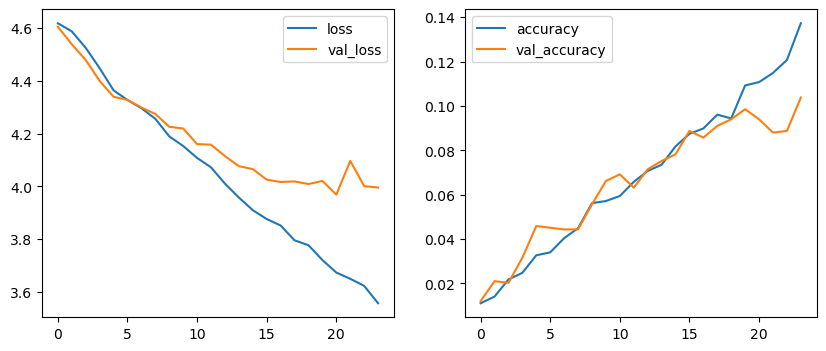

In [40]:
#plotting loss and accuracy over epochs
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

history_df = pd.DataFrame(history.history)
history_df[['loss', 'val_loss']].plot(kind='line', ax=ax[0])
history_df[['accuracy', 'val_accuracy']].plot(kind='line', ax=ax[1])

In [41]:
# Predicting for the test data using my CNN and seeing its performance
predictions = model.predict(test_images_gr)
prediction_labels = np.argmax(predictions, axis=1)
print(classification_report(test_labels, prediction_labels, target_names=class_names))
pd.DataFrame(confusion_matrix(test_labels, prediction_labels), index=class_names, columns=class_names)

90/90 [==============================] - 1s 14ms/step
                       precision    recall  f1-score   support

           air hockey       0.10      0.04      0.06        24
      ampute football       0.00      0.00      0.00        22
              archery       0.00      0.00      0.00        29
        arm wrestling       0.06      0.38      0.10        16
         axe throwing       0.00      0.00      0.00        17
         balance beam       0.29      0.16      0.21        31
        barell racing       0.50      0.03      0.06        32
             baseball       0.00      0.00      0.00        31
           basketball       0.00      0.00      0.00        34
       baton twirling       0.00      0.00      0.00        35
            bike polo       0.00      0.00      0.00        25
            billiards       0.05      0.11      0.07        18
                  bmx       0.00      0.00      0.00        22
              bobsled       0.00      0.00      0.00        27


c:\Users\aviko\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\aviko\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\aviko\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,air hockey,ampute football,archery,arm wrestling,axe throwing,balance beam,barell racing,baseball,basketball,baton twirling,...,tug of war,ultimate,uneven bars,volleyball,water cycling,water polo,weightlifting,wheelchair basketball,wheelchair racing,wingsuit flying
air hockey,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
ampute football,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
archery,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
arm wrestling,0,0,0,6,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
axe throwing,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
water polo,0,0,1,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
weightlifting,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
wheelchair basketball,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,8,0,0
wheelchair racing,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0


Looking at the model performance plots, as well as the confusion matrix and performance report on the test data, my own CNN is not performing that great. It maxed out around an accuracy of 0.09 (so it is only right about 10% of the time). Now I want to try transfer learning with a popular pre-trained CNN, VGG-19.

### Transfer Learning with the VGG-19 CNN

Transfer learning is basically using a model that was trained on a larger dataset than the one you have. Using the knowledge that this pre-trained model has from that large dataset, we can have a better performing CNN. To get started, I will process my data again, so that we get an RGB array instead of a greyscale array.

In [73]:
labels = pd.read_csv("Training_set.csv") # loading the labels
label_encoder = preprocessing.LabelEncoder()
labels['num_label'] = label_encoder.fit_transform(labels['label']) # Encode labels to numerical values
file_paths = [[fname, 'train/' + fname] for fname in labels['filename']]
images = pd.DataFrame(file_paths, columns=['filename', 'filepaths'])
train_data = pd.merge(images, labels, how = 'right', on = 'filename')

data = [] # initialize an empty numpy array
image_size = 200 # image size taken is 100 here. one can take other size too
for i in range(len(train_data)):
    img_array = cv2.imread(train_data['filepaths'][i], cv2.IMREAD_COLOR) # reading in the image as a RGB array
    new_img_array = cv2.resize(img_array, (image_size, image_size)) # resizing the image array
    data.append([new_img_array, train_data['num_label'][i]])

In [59]:
train, test = train_test_split(data, test_size=0.30) #splitting training and testing data

In [60]:
#making lists to store training and testing images and labels
train_images = []
train_labels = []
for tr in train:
    train_images.append(tr[0])
    train_labels.append(tr[1])

test_images = []
test_labels = []
for te in test:
    test_images.append(te[0])
    test_labels.append(te[1])

#making the lists numpy arrays
train_images = np.array(train_images)
train_labels = np.array(train_labels)
test_images = np.array(test_images)
test_labels = np.array(test_labels)

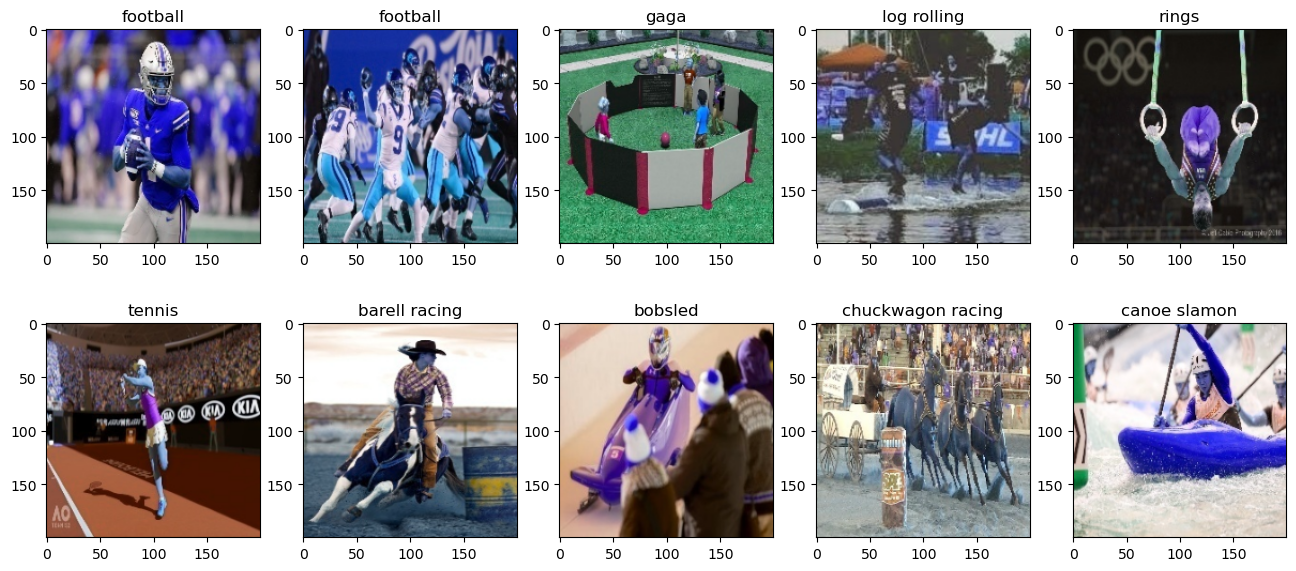

In [61]:
#Plotting first 10 images
fig, ax = plt.subplots(2, 5, figsize=(16, 7))
c = 0
class_names = list(label_encoder.classes_)
for i in range(10):
    idx = i // 5
    idy = i % 5
    ax[idx, idy].imshow(train_images[i])
    ax[idx, idy].set_title(class_names[train_labels[i]])

Now I will bring in the VGG-19 model.

In [62]:
# define input shape
INPUT_SHAPE = (200, 200, 3)

# get the VGG19 model
vgg_layers = tf.keras.applications.vgg19.VGG19(weights='imagenet', include_top=False, input_shape=INPUT_SHAPE)

vgg_layers.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 200, 200, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 200, 200, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 100, 100, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 100, 100, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 100, 100, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 50, 50, 128)       0     

In [63]:
# Fine-tune all the layers
for layer in vgg_layers.layers:
    layer.trainable = True

# Check the trainable status of the individual layers
for layer in vgg_layers.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x0000017F3D5C0850> True
<keras.layers.convolutional.conv2d.Conv2D object at 0x0000017F37E34490> True
<keras.layers.convolutional.conv2d.Conv2D object at 0x00000180FA922E50> True
<keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x0000017F37E34820> True
<keras.layers.convolutional.conv2d.Conv2D object at 0x00000180FA922820> True
<keras.layers.convolutional.conv2d.Conv2D object at 0x0000018099B50BB0> True
<keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x0000017F3D60D850> True
<keras.layers.convolutional.conv2d.Conv2D object at 0x0000017F3D2D24F0> True
<keras.layers.convolutional.conv2d.Conv2D object at 0x0000018099B673D0> True
<keras.layers.convolutional.conv2d.Conv2D object at 0x000001808DE59370> True
<keras.layers.convolutional.conv2d.Conv2D object at 0x0000017F4AEED0D0> True
<keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x0000017F4AEEDDF0> True
<keras.layers.convolutional.conv2d.Conv2D object at 0x000001

This is where I now use the VGG-19 layers to build my own model to predict the sport in the images.

In [64]:
# define sequential model
model = tf.keras.models.Sequential()
# define rescaling layer
model.add(tf.keras.layers.Rescaling(1./255, input_shape=INPUT_SHAPE))

# Add the vgg convolutional base model
model.add(vgg_layers)

# add flatten layer
model.add(tf.keras.layers.Flatten())

# add dense layers with some dropout
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.3))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.3))

# add output layer
model.add(tf.keras.layers.Dense(100, activation='softmax'))

# compile model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# view model layers
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_11 (Rescaling)    (None, 200, 200, 3)       0         
                                                                 
 vgg19 (Functional)          (None, 6, 6, 512)         20024384  
                                                                 
 flatten_12 (Flatten)        (None, 18432)             0         
                                                                 
 dense_42 (Dense)            (None, 256)               4718848   
                                                                 
 dropout_29 (Dropout)        (None, 256)               0         
                                                                 
 dense_43 (Dense)            (None, 256)               65792     
                                                                 
 dropout_30 (Dropout)        (None, 256)             

In [65]:
EPOCHS = 100 #training model for 100 epochs
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, verbose=1) #early stopping stops model training when validation loss does not change a lot

history = model.fit(train_images, train_labels, batch_size=32, callbacks=[es_callback], validation_split=0.2, epochs=EPOCHS, verbose=1) #training the model

Epoch 1/100
167/167 [==============================] - 85s 461ms/step - loss: 4.6373 - accuracy: 0.0105 - val_loss: 4.5694 - val_accuracy: 0.0165
Epoch 2/100
167/167 [==============================] - 76s 453ms/step - loss: 4.5351 - accuracy: 0.0282 - val_loss: 4.4074 - val_accuracy: 0.0594
Epoch 3/100
167/167 [==============================] - 92s 552ms/step - loss: 4.3028 - accuracy: 0.0707 - val_loss: 4.0141 - val_accuracy: 0.1361
Epoch 4/100
167/167 [==============================] - 98s 590ms/step - loss: 3.9426 - accuracy: 0.1280 - val_loss: 3.5068 - val_accuracy: 0.2391
Epoch 5/100
167/167 [==============================] - 97s 578ms/step - loss: 3.5043 - accuracy: 0.2036 - val_loss: 3.1518 - val_accuracy: 0.3090
Epoch 6/100
167/167 [==============================] - 97s 584ms/step - loss: 2.9888 - accuracy: 0.2959 - val_loss: 2.7325 - val_accuracy: 0.3812
Epoch 7/100
167/167 [==============================] - 100s 597ms/step - loss: 2.5709 - accuracy: 0.3810 - val_loss: 2.4285 

<AxesSubplot: >

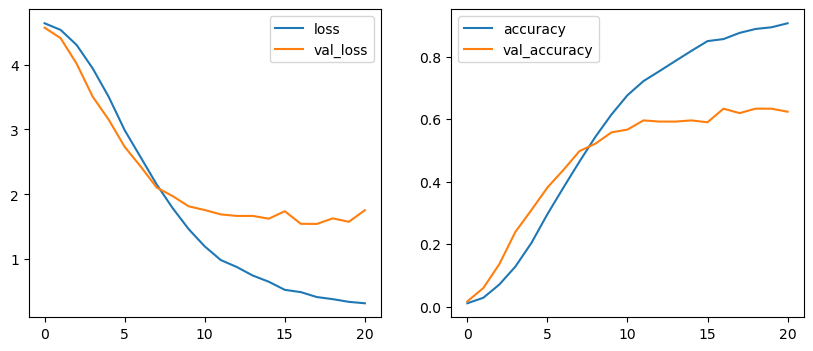

In [66]:
#plotting loss and accuracy over epochs
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

history_df = pd.DataFrame(history.history)
history_df[['loss', 'val_loss']].plot(kind='line', ax=ax[0])
history_df[['accuracy', 'val_accuracy']].plot(kind='line', ax=ax[1])

In [67]:
# testing model performance on test data, which is similar to performance on training data
predictions = model.predict(test_images)
prediction_labels = np.argmax(predictions, axis=1)
print(classification_report(test_labels, prediction_labels, target_names=class_names))
pd.DataFrame(confusion_matrix(test_labels, prediction_labels), index=class_names, columns=class_names)

90/90 [==============================] - 14s 136ms/step
                       precision    recall  f1-score   support

           air hockey       0.62      0.54      0.58        24
      ampute football       0.68      0.52      0.59        25
              archery       0.62      0.48      0.54        27
        arm wrestling       0.92      0.88      0.90        26
         axe throwing       0.65      0.65      0.65        20
         balance beam       0.70      0.75      0.72        40
        barell racing       0.76      0.85      0.80        33
             baseball       0.29      0.31      0.30        36
           basketball       0.28      0.18      0.22        39
       baton twirling       0.29      0.29      0.29        24
            bike polo       0.74      0.54      0.62        26
            billiards       0.90      0.90      0.90        31
                  bmx       0.77      0.25      0.38        40
              bobsled       0.31      0.52      0.39        2

,air hockey,ampute football,archery,arm wrestling,axe throwing,balance beam,barell racing,baseball,basketball,baton twirling,...,tug of war,ultimate,uneven bars,volleyball,water cycling,water polo,weightlifting,wheelchair basketball,wheelchair racing,wingsuit flying
air hockey,13,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
ampute football,0,13,0,0,0,0,0,0,0,0,...,0,3,0,0,0,0,0,0,1,0
archery,0,0,13,0,1,0,1,0,0,0,...,0,0,0,2,0,0,0,0,0,0
arm wrestling,0,0,0,23,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
axe throwing,0,0,0,0,13,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
water polo,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,18,0,0,0,0
weightlifting,0,0,1,0,0,1,0,0,0,0,...,0,1,0,1,0,0,10,0,0,0
wheelchair basketball,0,0,0,0,0,0,0,0,3,0,...,0,0,0,1,0,0,0,11,1,0
wheelchair racing,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,9,0


So this CNN definitely performed a lot better than my previous one(maxing out at around 0.6 accuracy). Althought being 60% right still is not great, it is a lot better than 10%. 

### Final Test Data Submission

In [70]:
labels = pd.read_csv("Testing_set.csv") # loading the labels
file_paths = [[fname, 'test/' + fname] for fname in labels['filename']]
images = pd.DataFrame(file_paths, columns=['filename', 'filepaths'])
new_test_data = pd.merge(images, labels, how = 'inner', on = 'filename')

data = [] # initialize an empty numpy array
image_size = 200 # image size taken is 200 here. one can take other size too
for i in range(len(new_test_data)):
    img_array = cv2.imread(new_test_data['filepaths'][i], cv2.IMREAD_COLOR) # converting the image to RGB array
    new_img_array = cv2.resize(img_array, (image_size, image_size)) # resizing the image array
    data.append(new_img_array)

new_test_images = np.array(data)

In [71]:
new_predictions = model.predict(new_test_images)
new_prediction_labels = np.argmax(new_predictions, axis=1)

128/128 [==============================] - 15s 120ms/step


In [74]:
res = pd.DataFrame({'label': label_encoder.inverse_transform(new_prediction_labels)})

In [75]:
res

,label
0,rugby
1,hockey
2,sky surfing
3,bmx
4,pole vault
...,...
4067,rugby
4068,barell racing
4069,jai alai
4070,curling


In [76]:
res.to_csv("submission.csv", index = False)

### Final score on submission data is 62.24406224406225.